# INERZIA DISCO
## RACCOLTA DATI

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione2 import RettaInterpolata

import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'disco.csv'
fr = pd.read_csv(FILE)

alfa1 = np.mean(fr['Alfa1 (1-5)'])
sigma_alfa1 = np.std(fr['Alfa1 (1-5)'])

alfa2 = np.mean(fr["Alfa2 (7-11)"])
sigma_alfa2 = np.std(fr["Alfa2 (7-11)"])

alfa3 = np.mean(fr["Alfa3 (12-16)"])
sigma_alfa3 = np.std(fr['Alfa3 (12-16)'])

m = np.array([50,70,85]) * 0.001
alfa = np.array([alfa1,alfa2,alfa3]) # gr/s^2
raggio = 0.01 # m
alfa = (alfa/180) * np.pi # rad/s^2
sigma_alfa = np.array([sigma_alfa1,sigma_alfa2,sigma_alfa3])
sigma_alfa = (sigma_alfa/180)*np.pi #rad/s^2

r_disco = 0.05 #m
m_disco = 0.12 #Kg

## ANALISI DATI

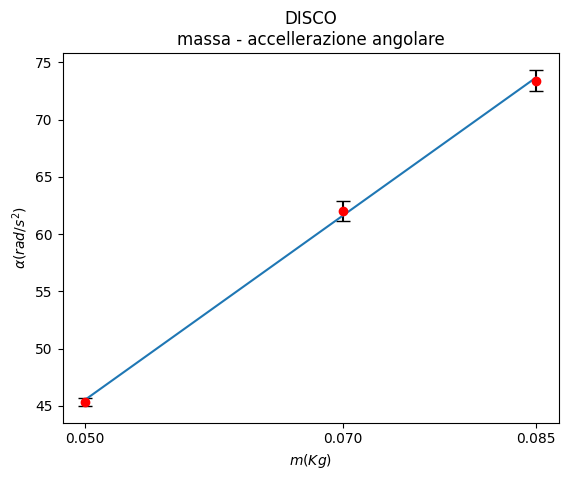


linearità: 
B: 803.7005350129539
sigmaB: [18.78261374 37.46950312 39.52259362]
A: 5.352500276319006
sigmaA: [1.31142463 2.61616568 2.75951492]
sigmaY: [0.4664244  0.9304717  0.98145564]

chiquadro osservato: 0.47850596775374343
chiquadro ridotto: 0.47850596775374343
gradi di libertà: 1
vincoli: 2
        


In [12]:
r = RettaInterpolata(m, alfa, sigma_alfa)
plt.errorbar(m,alfa,yerr=sigma_alfa,fmt='o',color='red',ecolor='black',capsize=5)
plt.plot(r.best_x,r.best_y)
plt.xticks(m)
plt.title("DISCO\nmassa - accellerazione angolare")
plt.ylabel("$\\alpha (rad/s^2)$")
plt.xlabel("$m (Kg)$")
plt.show()

print(r)

### inerzia attesa

$I = \frac{1}{2} m r^2$

In [21]:
I_disco_attesa = 0.5 * (r_disco ** 2) * m_disco
print('Inerzia disco attesa: ',np.round(I_disco_attesa,6))

Inerzia disco attesa:  0.00015


### inerzia misurata

$I\alpha = mgr \Rightarrow I = \frac{mgr}{\alpha}$

$\alpha \propto m \Rightarrow \alpha = \frac{gr}{I} m$

$B = \frac{gr}{I} \Rightarrow I =  \frac{gr}{B}$

In [20]:
I = 9.8 * raggio / r.B
sigmaI = I * (np.mean(r.sigmaB)/r.B) # i sigmaB sono 3

print('Inerzia misurata disco: ',np.round(I,6),np.round(sigmaI,6))

Inerzia misurata disco:  0.000122 5e-06
